# Create a slice with PTP for precise time measurements

For running MF timestamp or OWL (one-way latency measurement) tools, slice nodes must meet prerequisites: 

+ Git and Dockerhub must be reachable 
+ Docker has to be running
+ PTP (Precision Time Protocol) clock must be running/

This notebook creates a 3-node slice and sets up all the the above

(Tested on 2023/08/18)

## Import the FABlib Library


In [19]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager

try:
    fablib = fablib_manager()
                     
    fablib.show_config()
except Exception as e:
    print(f"Exception: {e}")

Credential Manager,cm.fabric-testbed.net
Orchestrator,orchestrator.fabric-testbed.net
Project ID,6ce270de-788d-4e07-8bae-3206860a6387
Token File,/home/fabric/.tokens.json
Bastion Host,bastion.fabric-testbed.net
Bastion Username,kpalamat_0000155437
Bastion Private Key File,/home/fabric/work/fabric_config/fabric_bastion_key
Slice Private Key File,/home/fabric/work/fabric_config/slice_key
Slice Public Key File,/home/fabric/work/fabric_config/slice_key.pub
Log File,/tmp/fablib/fablib.log
Log Level,INFO


## Create an Experiment Slice

The following creates three nodes, on different sites, with basic NICs connected to FABRIC's FABnetv4 internet. Sites can be changed, but make sure that the site is PTP-compatible. 

Current list of PTP-compatible sites:

- STAR
- MAX
- MICH
- MASS 
- UTAH
- NCSA
- UCSD
- FIU
- CLEM
- CERN

In [20]:
slice_name = 'PTP_slice_All'

#[site1,site2,site3] = fablib.get_random_sites(count=2, 
#        avoid=["DALL","GPN","LBNL","RENC","SALT","TACC","UKY","WASH","NCSA","LOSA","GATECH","INDI","MAX", "MASS","NEWY","SRI","UCSD"])

sites = ["STAR", "MAX", "MICH", "MASS", "UTAH", "NCSA", "UCSD", "FIU", "CLEM", "CERN"]
node_names  =  ["STAR", "MAX", "MICH", "MASS", "UTAH", "NCSA", "UCSD", "FIU", "CLEM", "CERN"]
print(node_names, sites)

['STAR', 'MAX', 'MICH', 'MASS', 'UTAH', 'NCSA', 'UCSD', 'FIU', 'CLEM', 'CERN'] ['STAR', 'MAX', 'MICH', 'MASS', 'UTAH', 'NCSA', 'UCSD', 'FIU', 'CLEM', 'CERN']


In [21]:
slice_name = "PTP_slice_All"

try:
    slice = fablib.get_slice(name=slice_name)
except Exception as e:
    print(f"Fail: {e}")
print (slice)

Fail: Unable to find slice "PTP_slice_All" for this project. Check slice name spelling and project id.


AttributeError: 'NoneType' object has no attribute 'name'

In [22]:
#Create Slice. add_fabnet() automatically adds an L3 interface on each node and assigns an IP address.
slice = fablib.new_slice(name=slice_name)

nodes = []
for i in range(10):
    nodes.append(slice.add_node(name=node_names[i], site=sites[i], image='docker_rocky_8'))

for node in nodes:
    node.add_fabnet()

In [23]:
slice.submit();

Exception: Submit request error: return_status Status.FAILURE, slice_reservations: (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.21.6', 'Date': 'Thu, 02 May 2024 07:42:57 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '192', 'Connection': 'keep-alive', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'DNT, User-Agent, X-Requested-With, If-Modified-Since, Cache-Control, Content-Type, Range, Authorization', 'Access-Control-Allow-Methods': 'GET, POST, PUT, PATCH, DELETE, OPTIONS', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'Content-Length, Content-Range, X-Error', 'X-Error': 'Site MASS in Maint'})
HTTP response body: b'{\n    "errors": [\n        {\n            "details": "Site MASS in Maint",\n            "message": "Internal Server Error"\n        }\n    ],\n    "size": 1,\n    "status": 500,\n    "type": "error"\n}'


In [6]:
l2_nets = [(n.get_name(), {'color': 'lavender'}) for n in slice.get_l2networks() ]
l3_nets = [(n.get_name(), {'color': 'pink'}) for n in slice.get_l3networks() ]
hosts   =   [(n.get_name(), {'color': 'lightblue'}) for n in slice.get_nodes()]
nodesForGraph = l2_nets + l3_nets + hosts
ifaces = [iface.toDict() for iface in slice.get_interfaces()]
edges = [(iface['network'], iface['node'], 
          {'label': iface['physical_dev'] + '\n' + iface['ip_addr'] + '\n' + iface['mac']}) for iface in ifaces]


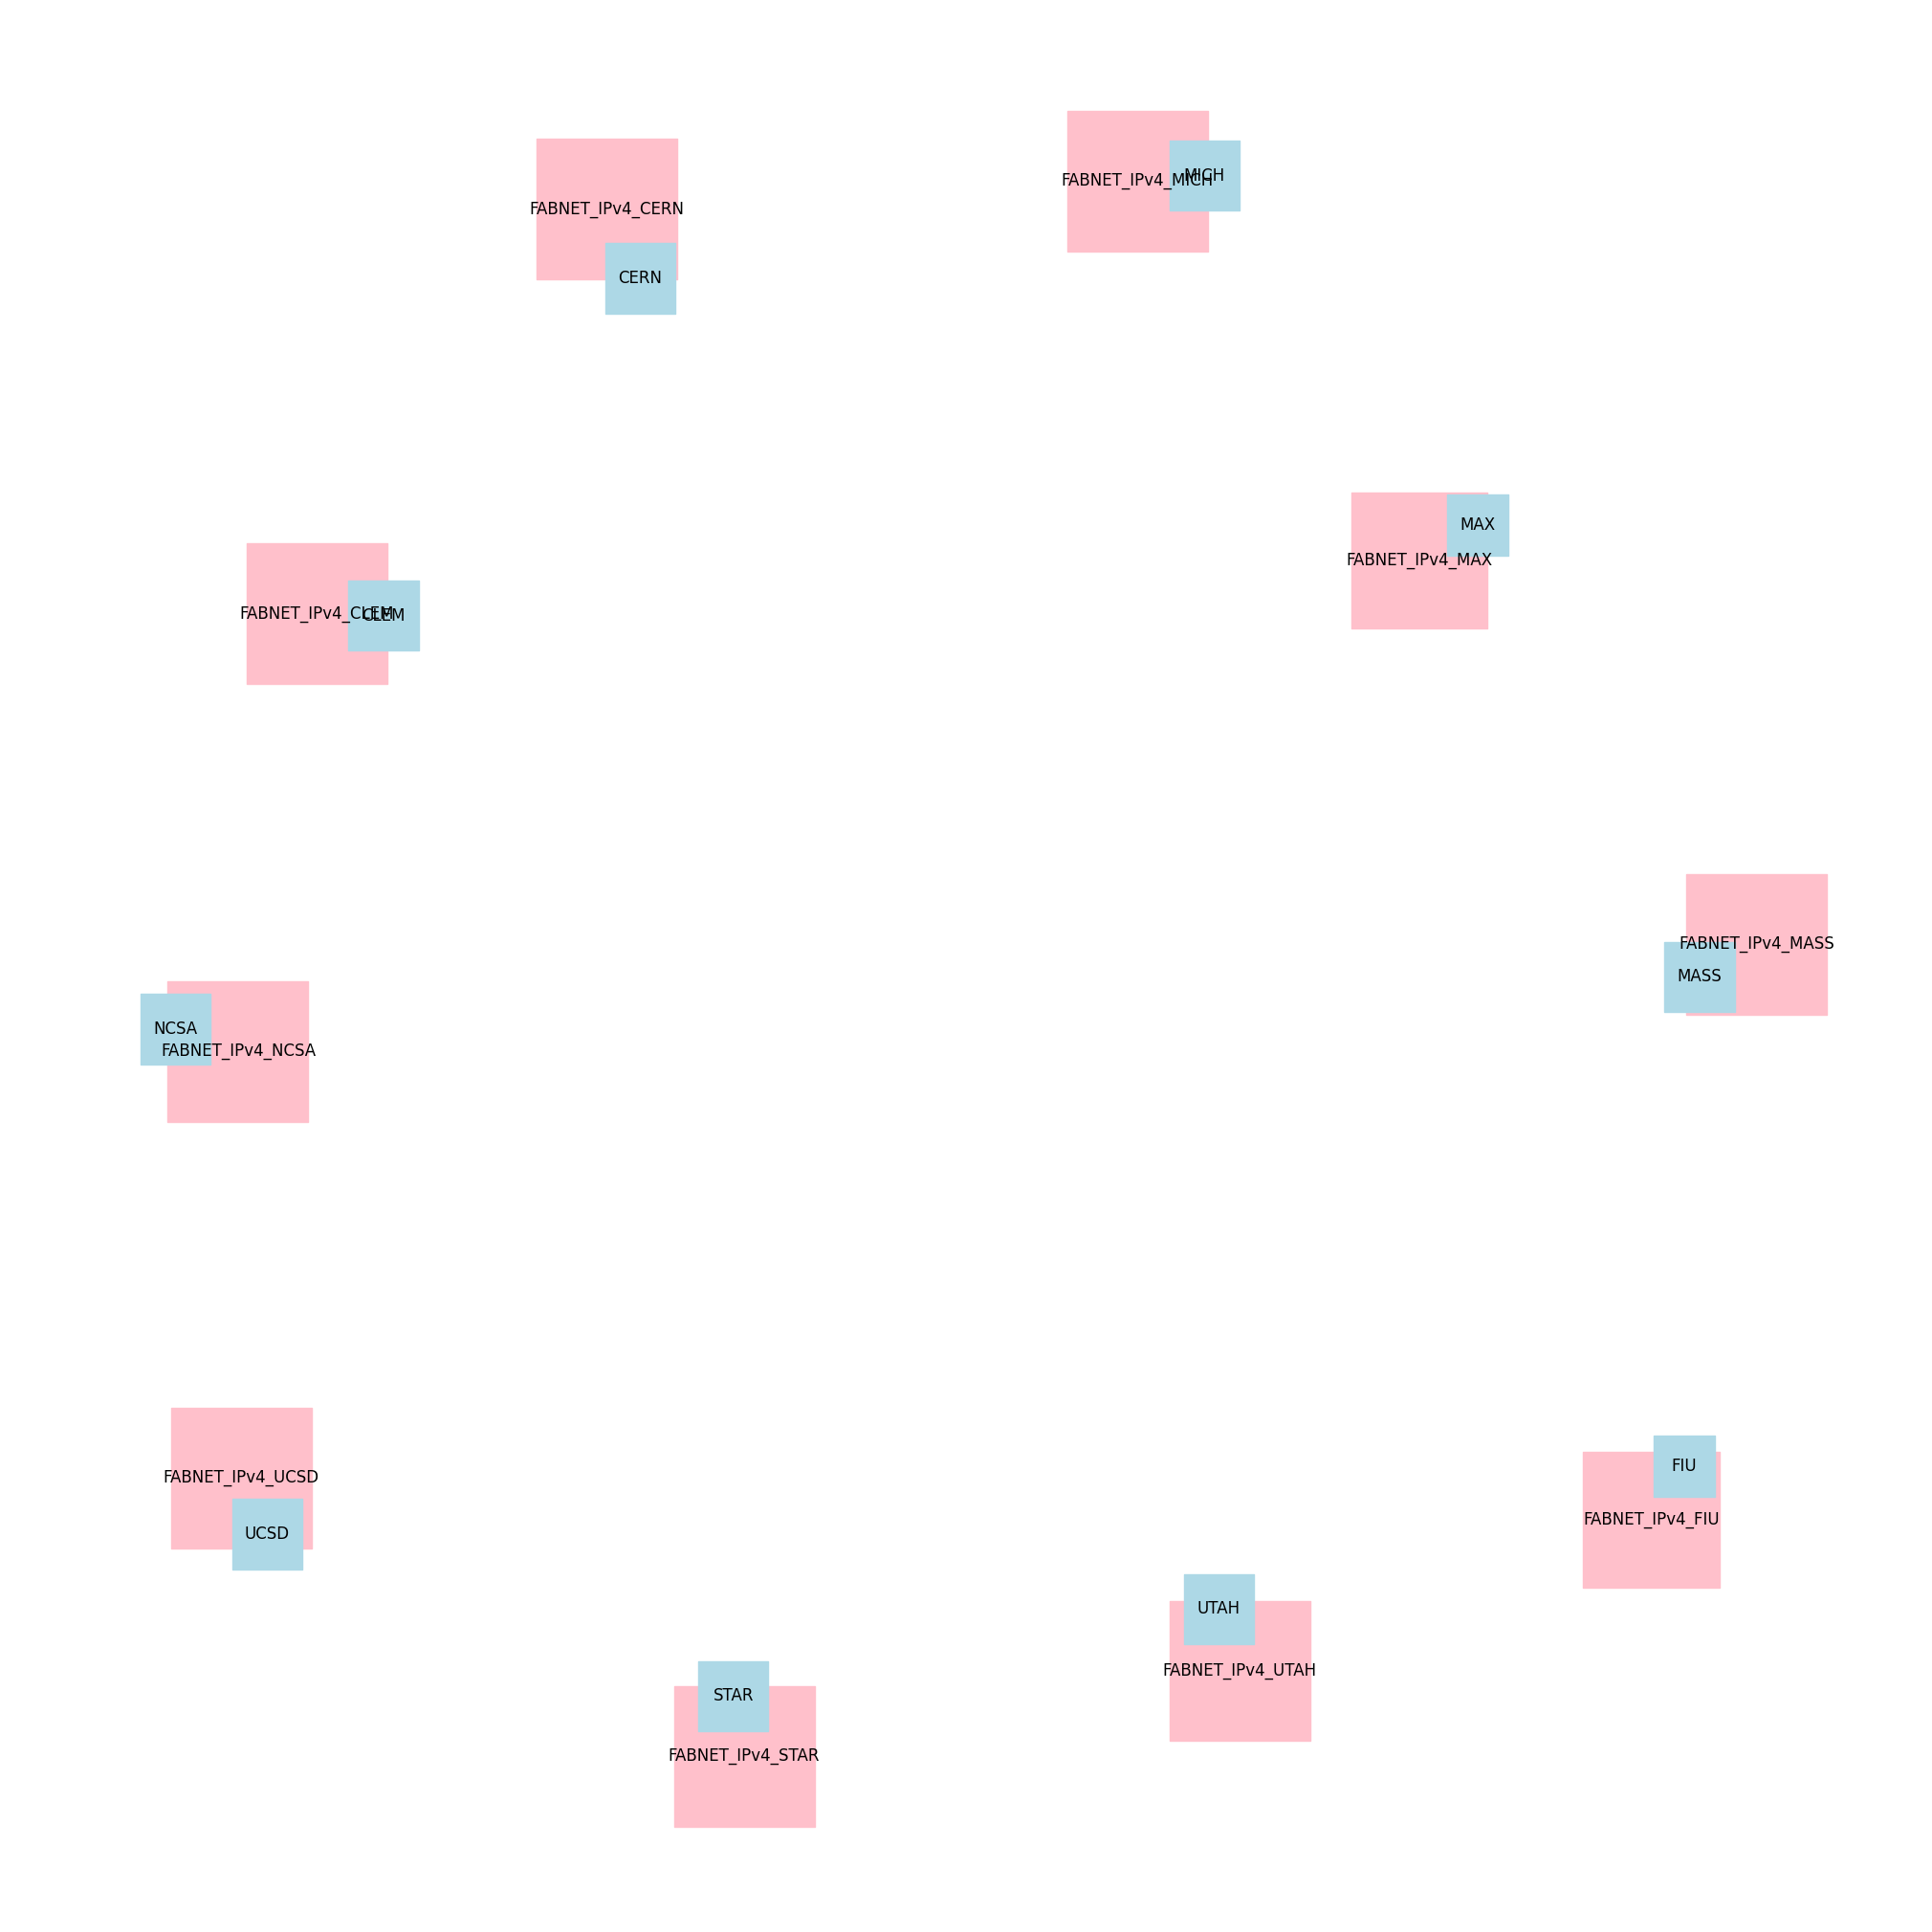

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(len(nodesForGraph),len(nodesForGraph)))
G = nx.Graph()
G.add_nodes_from(nodesForGraph)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_shape='s',  
        node_color=[n[1]['color'] for n in nodesForGraph], 
        node_size=[len(n[0])*700 for n in nodesForGraph],  
        with_labels=True);
nx.draw_networkx_edge_labels(G,pos,
                             edge_labels=nx.get_edge_attributes(G,'label'),
                             font_color='gray',  font_size=8, rotate=False);

## (Optional) Observe the Slice's Attributes

In [6]:
try:
    slice = fablib.get_slice(name=slice_name)
    slice.show()
    slice.list_nodes()
    slice.list_networks()
    slice.list_interfaces()
except Exception as e:
    print(f"Exception: {e}")

ID,86fae5c4-b829-4777-bf04-0e28f03bdd28
Name,PTP_slice_All
Lease Expiration (UTC),2024-04-22 19:58:33 +0000
Lease Start (UTC),2024-04-21 19:58:35 +0000
Project ID,6ce270de-788d-4e07-8bae-3206860a6387
State,StableOK


ID,Name,Cores,RAM,Disk,Image,Image Type,Host,Site,Username,Management IP,State,Error,SSH Command,Public SSH Key File,Private SSH Key File
2c0c4946-e98d-4dbe-a8a1-7fe3f7f198ca,CERN,2,8,10,docker_rocky_8,qcow2,cern-w2.fabric-testbed.net,CERN,rocky,2001:400:a100:3090:f816:3eff:fe61:73f5,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2001:400:a100:3090:f816:3eff:fe61:73f5,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
5395b518-c54a-4e34-a3a1-3db9dd2d237c,CLEM,2,8,10,docker_rocky_8,qcow2,clem-w2.fabric-testbed.net,CLEM,rocky,2620:103:a006:12:f816:3eff:fe26:7907,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2620:103:a006:12:f816:3eff:fe26:7907,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
54c724ba-8be7-400e-b84f-9be95dbae935,FIU,2,8,10,docker_rocky_8,qcow2,fiu-w1.fabric-testbed.net,FIU,rocky,131.94.57.60,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@131.94.57.60,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
f66c8f4b-328d-4d69-8c27-06c5274c2b69,MASS,2,8,10,docker_rocky_8,qcow2,mass-w3.fabric-testbed.net,MASS,rocky,2001:48e8:6401:3:f816:3eff:fe63:aeb1,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2001:48e8:6401:3:f816:3eff:fe63:aeb1,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
4a8e8700-2f17-46f3-9a5d-13328783f8e3,MAX,2,8,10,docker_rocky_8,qcow2,max-w4.fabric-testbed.net,MAX,rocky,2001:468:c00:ffc4:f816:3eff:fe3a:e1b4,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2001:468:c00:ffc4:f816:3eff:fe3a:e1b4,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
fd8bfdb6-36bf-42f4-8031-82fbf06cd7c1,MICH,2,8,10,docker_rocky_8,qcow2,mich-w1.fabric-testbed.net,MICH,rocky,2607:f018:110:11:f816:3eff:fef8:116f,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2607:f018:110:11:f816:3eff:fef8:116f,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
9458991b-c352-44dd-87de-b60df59c9255,NCSA,2,8,10,docker_rocky_8,qcow2,ncsa-w2.fabric-testbed.net,NCSA,rocky,2620:0:c80:1001:f816:3eff:fe9b:d626,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2620:0:c80:1001:f816:3eff:fe9b:d626,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
e8a416e9-f8b7-4afe-a9d6-c76f41b3c835,STAR,2,8,10,docker_rocky_8,qcow2,star-w2.fabric-testbed.net,STAR,rocky,2001:400:a100:3030:f816:3eff:fece:9ef5,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2001:400:a100:3030:f816:3eff:fece:9ef5,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
8b92f65d-5b0a-4e6e-afa8-7b21f9e97dd6,UCSD,2,8,10,docker_rocky_8,qcow2,ucsd-w4.fabric-testbed.net,UCSD,rocky,132.249.252.159,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@132.249.252.159,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
ff773d33-9fc5-42a5-9c82-7a40005b516a,UTAH,2,8,10,docker_rocky_8,qcow2,utah-w5.fabric-testbed.net,UTAH,rocky,2001:1948:417:7:f816:3eff:fe26:f28f,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config rocky@2001:1948:417:7:f816:3eff:fe26:f28f,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key


ID,Name,Layer,Type,Site,Subnet,Gateway,State,Error
f347b98a-848d-4dba-827a-e93630b27ef3,FABNET_IPv4_CERN,L3,FABNetv4,CERN,10.143.2.0/24,10.143.2.1,Active,
e1795319-df78-4f8a-a66f-6917818f5318,FABNET_IPv4_CLEM,L3,FABNetv4,CLEM,10.136.1.0/24,10.136.1.1,Active,
46569e85-f7b1-4586-95b6-bb6406ba5d8b,FABNET_IPv4_FIU,L3,FABNetv4,FIU,10.135.130.0/24,10.135.130.1,Active,
e14cbf0c-f9b6-43c6-973c-ea796e5d9b1b,FABNET_IPv4_MASS,L3,FABNetv4,MASS,10.131.130.0/24,10.131.130.1,Active,
9942d8ba-f02f-4607-8eb6-474663b9ac97,FABNET_IPv4_MAX,L3,FABNetv4,MAX,10.130.1.0/24,10.130.1.1,Active,
07b32b26-ae6b-49a3-a997-fd1d0b44f932,FABNET_IPv4_MICH,L3,FABNetv4,MICH,10.131.1.0/24,10.131.1.1,Active,
08854b78-546d-4b16-aa38-0d22633d13e6,FABNET_IPv4_NCSA,L3,FABNetv4,NCSA,10.132.133.0/24,10.132.133.1,Active,
68820ea6-4cff-4356-adce-7c1cf352b1c9,FABNET_IPv4_STAR,L3,FABNetv4,STAR,10.129.129.0/24,10.129.129.1,Active,
cbdde6d2-e1f3-4def-bb42-73969f95d819,FABNET_IPv4_UCSD,L3,FABNetv4,UCSD,10.134.129.0/24,10.134.129.1,Active,
f1810fb1-74d7-4833-9f2a-bec712093103,FABNET_IPv4_UTAH,L3,FABNetv4,UTAH,10.132.3.0/24,10.132.3.1,Active,


Name,Short Name,Node,Network,Bandwidth,Mode,VLAN,MAC,Physical Device,Device,IP Address,Numa Node
STAR-FABNET_IPv4_STAR_nic-p1,p1,STAR,FABNET_IPv4_STAR,100,auto,,1E:35:91:69:F4:B6,enp7s0,enp7s0,10.129.129.2,6
MAX-FABNET_IPv4_MAX_nic-p1,p1,MAX,FABNET_IPv4_MAX,100,auto,,06:3B:31:3D:E8:28,enp7s0,enp7s0,10.130.1.2,4
MICH-FABNET_IPv4_MICH_nic-p1,p1,MICH,FABNET_IPv4_MICH,100,auto,,2A:63:5A:00:38:27,enp7s0,enp7s0,10.131.1.2,6
MASS-FABNET_IPv4_MASS_nic-p1,p1,MASS,FABNET_IPv4_MASS,100,auto,,06:51:15:6C:19:23,enp7s0,enp7s0,10.131.130.2,4
UTAH-FABNET_IPv4_UTAH_nic-p1,p1,UTAH,FABNET_IPv4_UTAH,100,auto,,02:65:8F:CC:5B:CC,enp7s0,enp7s0,10.132.3.2,4
NCSA-FABNET_IPv4_NCSA_nic-p1,p1,NCSA,FABNET_IPv4_NCSA,100,auto,,2E:B9:9C:F5:B9:87,enp7s0,enp7s0,10.132.133.2,4
UCSD-FABNET_IPv4_UCSD_nic-p1,p1,UCSD,FABNET_IPv4_UCSD,100,auto,,02:18:C1:EE:87:8F,enp6s0,enp6s0,10.134.129.2,4
FIU-FABNET_IPv4_FIU_nic-p1,p1,FIU,FABNET_IPv4_FIU,100,auto,,0A:DA:C6:77:D4:70,enp6s0,enp6s0,10.135.130.2,6
CLEM-FABNET_IPv4_CLEM_nic-p1,p1,CLEM,FABNET_IPv4_CLEM,100,auto,,2E:3E:BF:85:F4:61,enp6s0,enp6s0,10.136.1.2,4
CERN-FABNET_IPv4_CERN_nic-p1,p1,CERN,FABNET_IPv4_CERN,100,auto,,0E:D9:C9:B3:C3:76,enp7s0,enp7s0,10.143.2.2,4


<!-- ## Configure IP Addresses

### Get the Assigned Subnet

FABnetv4 networks are assigned a subnet and gateway by FABRIC.  You can get the subnet and available IPs from the FABlib objects.  -->

## Check connectivity via Experimenter's network

In [20]:
try:
    
#     nodes[3] = slice.get_node(name=node_names[6])   
#     nodes[6] = slice.get_node(name=node_names[8])
#     node3_addr = nodes[3].get_interface(network_name=f'FABNET_IPv4_{nodes[3].get_site()}').get_ip_addr()
#     node6_addr = nodes[6].get_interface(network_name=f'FABNET_IPv4_{nodes[6].get_site()}').get_ip_addr()
    
#     print (f"ping from {nodes[3].get_name()} to {nodes[6].get_name()}")
#     nodes[3].execute(f"ping -c 5 {node6_addr}")
    
    
#     nodes[0].execute('hostname')
#     nodes[0].execute(f'traceroute {node3_addr}')  
    
#     nodes[2].execute('hostname')
#     nodes[2].execute(f'traceroute {node1_addr}')
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            source_node = slice.get_node(name = node_names[i])
            destination_node = slice.get_node(name = node_names[j])
            source_addr = source_node.get_interface(network_name=f'FABNET_IPv4_{source_node.get_site()}').get_ip_addr()
            destination_addr = destination_node.get_interface(network_name=f'FABNET_IPv4_{destination_node.get_site()}').get_ip_addr()

            print("\n")

            print(f"Traceroute from {destination_node.get_name()} to {source_node.get_name()}:")
            destination_node.execute(f"traceroute {source_addr}")
            print("\n")
    
except Exception as e:
    print(f"Exception: {e}")

ping from UCSD to CLEM
PING 10.136.1.2 (10.136.1.2) 56(84) bytes of data.
64 bytes from 10.136.1.2: icmp_seq=1 ttl=58 time=76.4 ms
64 bytes from 10.136.1.2: icmp_seq=2 ttl=58 time=76.4 ms
64 bytes from 10.136.1.2: icmp_seq=3 ttl=58 time=76.5 ms
64 bytes from 10.136.1.2: icmp_seq=4 ttl=58 time=76.4 ms
64 bytes from 10.136.1.2: icmp_seq=5 ttl=58 time=76.4 ms

--- 10.136.1.2 ping statistics ---
5 packets transmitted, 5 received, 0% packet loss, time 4006ms
rtt min/avg/max/mdev = 76.351/76.407/76.457/0.306 ms


# Prepare each node for time precision experiments

In [6]:
nodes = slice.get_nodes()

## Enable NAT64

### Upload and Execute the NAT64 Script

We will use a NAT64 script, which configures an *IPv6* node so that it can access non-*IPv6* services. To view the script, click [here](./nat64.sh). This script sets up the [Public NAT64 Service](https://nat64.net) on your node.

For more details on how uploading and executing scripts works on FABRIC, click [here](../upload_and_execute/upload_and_execute.ipynb).

Based on https://nat64.net/
Note that NAT64 could go away at any minute, as it is a public service ran independently by Kasper Dupont, and is not affiliated with FABRIC.

In [ ]:
# Change this to all nodes

from ipaddress import ip_address, IPv6Address

for node in nodes:
    try:     
        # If the node is an IPv6 Node then configure NAT64
        if node.validIPAddress(node.get_management_ip()) == "IPv6":
            # needed to fix sudo unable to resolve error
            commands = """
            sudo echo -n "127.0.0.1 " | sudo cat - /etc/hostname  | sudo tee -a /etc/hosts;
            sudo echo -n "2a01:4f9:c010:3f02:64:0:8c52:7103       github.com\n"|sudo tee -a /etc/hosts;
            sudo echo -n "2a01:4f9:c010:3f02:64:0:8c52:7009       codeload.github.com\n"|sudo tee -a /etc/hosts;
            sudo echo -n "2a01:4f9:c010:3f02:64:0:b9c7:6e85       objects.githubusercontent.com\n"|sudo tee -a /etc/hosts;
            sudo echo -n "2600:1fa0:80b4:db49:34d9:6d1e::         ansible-galaxy.s3.amazonaws.com\n"|sudo tee -a /etc/hosts;
            sudo echo -n "2a01:4f9:c010:3f02:64:0:3455:9777       packages.confluent.io\n"|sudo tee -a /etc/hosts;
            """
            stdout, stderr = node.execute(commands, quiet=True)

        # Access non-IPv6 Services
        stdout, stderr = node.execute(f'sudo yum install -y -q git && git clone https://github.com/fabric-testbed/jupyter-examples.git')

        stdout, stderr = node.execute(f'ls jupyter-examples')

    except Exception as e:
        print(f"Exception: {e}")

 fatal: destination path 'jupyter-examples' already exists and is not an empty directory.
 Changelog.md
configure_and_validate.ipynb
CONTRIBUTING.md
docker_containers
fabric_examples
fabric_ssh_tunnel_tools
LICENSE
Readme.md
requirements.txt
start_here.ipynb
 fatal: destination path 'jupyter-examples' already exists and is not an empty directory.
 Changelog.md
configure_and_validate.ipynb
CONTRIBUTING.md
docker_containers
fabric_examples
fabric_ssh_tunnel_tools
LICENSE
Readme.md
requirements.txt
start_here.ipynb
 fatal: destination path 'jupyter-examples' already exists and is not an empty directory.
 Changelog.md
configure_and_validate.ipynb
CONTRIBUTING.md
docker_containers
fabric_examples
fabric_ssh_tunnel_tools
LICENSE
Readme.md
requirements.txt
start_here.ipynb
 Cloning into 'jupyter-examples'...
 Changelog.md
configure_and_validate.ipynb
CONTRIBUTING.md
docker_containers
fabric_examples
fabric_ssh_tunnel_tools
LICENSE
Readme.md
requirements.txt
start_here.ipynb
 Cloning into 'jup

## Set up PTP (Precision Time Protocol)

#### Clone MeasurementFramework Git repo Locally

In [ ]:
%%bash
rm -rf /tmp/MF;
git clone https://github.com/fabric-testbed/MeasurementFramework.git /tmp/MF;

#### Install and setup linux ptp package on all nodes 

In [ ]:
pre_requisites = f"""
`sudo apt-get update;sudo apt-get -y install ansible git` || `sudo dnf -y install epel-release ;sudo dnf -y install ansible git`
"""
ansible_instructions = f"""
cd /tmp/ansible;ansible-playbook --connection=local --inventory 127.0.0.1, --limit 127.0.0.1 playbook_fabric_experiment_ptp.yml;
"""

for node in nodes:
    print (f"Installing PTP on {node.get_name()}")
    node.upload_directory('/tmp/MF/instrumentize/ptp/ansible','/tmp/')
    node.execute(f"{pre_requisites}"\
                 f"{ansible_instructions}"\
                )
    print (f"Installation of PTP Completed on {node.get_name()}\n\n")

## Start Docker 

In [ ]:
for node in nodes:
    node.execute("sudo systemctl start docker")
    node.execute("sudo systemctl enable docker")
    node.execute("sudo usermod -aG docker rocky")
    
    print(f"\n Verify installtion... on {node.get_name()}")
    node.execute("docker --help")

# Delete the Slice

In [4]:
"""
try:
    slice = fablib.get_slice(name=slice_name)
    slice.delete()
except Exception as e:
    print(f"Exception: {e}")
"""

# Run OWL (One-Way Latency Measurements) 

Script for running OWL on one or more nodes in a slice. Output for each measurement is saved as a pcap file on the destination node. 
Current implementation on IPv4 experimenter interfaces only. Assumes each node has only 1 experimental interface.

(Tested on 2023/08/18)

# First things first

In [14]:
from fabrictestbed_extensions.fablib.fablib import fablib
import json

In [ ]:
slice_name = "PTP_slice_All"

try:
    slice = fablib.get_slice(name=slice_name)
except Exception as e:
    print(f"Fail: {e}")
print (slice)

Fail: Unable to find slice "PTP_slice_All" for this project. Check slice name spelling and project id.


AttributeError: 'NoneType' object has no attribute 'name'

In [18]:
from mflib import owl

# for debugging only
#import owl_local as owl

In [19]:
try:    
    node1 = slice.get_node(name=node_names[0])
    node2 = slice.get_node(name=node_names[1])
    node3 = slice.get_node(name=node_names[2])
    nodes = slice.get_nodes()
except Exception as e:
    print(f"Fail: {e}")   

## Look up IPs of nodes and decide which IP address to use 

Checking experiment IP addresses by filtering out meas_network addresses. Asssumes one experimenter interface per node.

In [20]:
node_ip_list = owl.nodes_ip_addrs(slice)
print(node_ip_list)

{'STAR': '10.129.129.2', 'MAX': '10.130.7.2', 'MICH': '10.131.3.2', 'MASS': '10.131.132.2', 'UTAH': '10.132.5.2', 'NCSA': '10.132.131.2', 'UCSD': '10.134.130.2', 'FIU': '10.135.133.2', 'CLEM': '10.136.2.2', 'CERN': '10.143.2.2'}


## Check OWL prerequisites on all nodes in the slice

Runs the following test and prints output on each node:

+ `git clone`
+ `ps -ef | grep phc2sys`
+ `docker --help`

In [21]:
owl.check_owl_prerequisites(slice)


***** On STAR...

***** Is github reachable?
 Cloning into 'teaching-materials'...
 total 8
drwxrwxr-x. 6 rocky rocky 4096 Nov 18 06:13 jupyter-examples
drwxrwxr-x. 5 rocky rocky 4096 Nov 18 07:22 teaching-materials

***** Is PTP is enabled?
root       16914       1  0 06:47 ?        00:00:00 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp1 -c enp7s0
root       17412       1  0 06:47 ?        00:00:00 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp1 -c CLOCK_REALTIME
rocky      26918   26917  0 07:22 ?        00:00:00 bash -c ps -ef | grep phc2sys
rocky      26938   26918  0 07:22 ?        00:00:00 grep phc2sys

*****Is Docker installed?

Usage:  docker [OPTIONS] COMMAND

A self-sufficient runtime for containers

Common Commands:
  run         Create and run a new container from an image
  exec        Execute a command in a running container
  ps          List containers
  build       Build an image from a Dockerfile

***** On MAX...

***** Is github reachable?
 Cloning into 'te

## Pull OWL image from DockerHub

In [22]:
image_name="fabrictestbed/owl:0.1.4"

for node in nodes:
    node.execute(f"sudo docker pull {image_name}") 

0.1.4: Pulling from fabrictestbed/owl
8b91b88d5577: Pulling fs layer
824416e23423: Pulling fs layer
8d53da260408: Pulling fs layer
84c8c79126f6: Pulling fs layer
2e1c130fa3ec: Pulling fs layer
e9571e66d363: Pulling fs layer
c2426a8d87d1: Pulling fs layer
5922e7f17bf6: Pulling fs layer
7935dece71a7: Pulling fs layer
aa4bd601fd3f: Pulling fs layer
6d94b93994d0: Pulling fs layer
e1e2036205d2: Pulling fs layer
895f77b56ce1: Pulling fs layer
84c8c79126f6: Waiting
2e1c130fa3ec: Waiting
c2426a8d87d1: Waiting
e9571e66d363: Waiting
5922e7f17bf6: Waiting
7935dece71a7: Waiting
6d94b93994d0: Waiting
e1e2036205d2: Waiting
aa4bd601fd3f: Waiting
895f77b56ce1: Waiting
824416e23423: Verifying Checksum
824416e23423: Download complete
8d53da260408: Verifying Checksum
8d53da260408: Download complete
84c8c79126f6: Verifying Checksum
84c8c79126f6: Download complete
2e1c130fa3ec: Verifying Checksum
2e1c130fa3ec: Download complete
8b91b88d5577: Verifying Checksum
8b91b88d5577: Download complete
c2426a8d87d1: 

# Run the experiment

There are 3 ways to use OWL

1. Specify each link with sender-capturer pair: this should be easiest method for most users.
2. Start each sender and capturer manually: this is useful when you want to have more precise control
3. Start on all links: this starts OWL on every pair of nodes in the slice (excluding meas-node if there is one)


**Note: By default, all the previously saved pcap files will be deleted when a node starts a new OWL capturer session. If this behavior is not desired, set `delete_previous_output` to `False`.**

## Method 1: Specify links by source and destination nodes
This examples runs OWL on the following links:

+ Node1 --> Node2
+ Node2 --> Node3
+ Node3 --> Node2

For each link, sender and capturer containers will start. If one node is a destination for more than 1 sender, only 1 capturer container instance will be created.

In [ ]:
owl.start_owl(slice, src_node=slice.get_node(name='Node1'), dst_node=slice.get_node(name='Node2'), img_name=image_name, probe_freq=1, no_ptp=False, outfile=None, 
              duration = 120, delete_previous_output=True)

In [ ]:
owl.start_owl(slice, src_node=slice.get_node(name='Node2'), dst_node=slice.get_node(name='Node3'), img_name=image_name, probe_freq=1, no_ptp=False, outfile=None, 
              duration = 600, delete_previous_output=True)

In [ ]:
owl.start_owl(slice, src_node=slice.get_node(name='Node3'), dst_node=slice.get_node(name='Node2'), img_name=image_name, probe_freq=1, no_ptp=False, outfile=None, 
              duration = 600, delete_previous_output=True)

### Check if they are running

In [ ]:
owl.check_owl_all(slice)

### Stop all OWL containers

In [ ]:
owl.stop_owl_all(slice)

### Verify

In [ ]:
owl.check_owl_all(slice)

## Method 2: start each sender, caputrer separately

If user desires more granular control, sender and capturer can be started/stopped independently.


In [ ]:
owl.start_owl_sender(slice, src_node=slice.get_node(name='Node1'), dst_node=slice.get_node(name='Node2'), img_name=image_name, duration=120)

In [ ]:
owl.start_owl_sender(slice, src_node=slice.get_node(name='Node1'), dst_node=slice.get_node(name='Node3'), img_name=image_name, duration=120)

In [ ]:
owl.start_owl_capturer(slice,  dst_node=slice.get_node(name='Node2'), img_name=image_name, duration=120)

In [ ]:
owl.start_owl_sender(slice, src_node=slice.get_node(name='Node3'), dst_node=slice.get_node(name='Node2'), img_name=image_name, duration=120)

### Check how the containers are running

In [ ]:
owl.check_owl_all(slice)

### Stop OWL containers on each node

The method finds all containers with the prefix `owl-sender_` in their names, stops and removes them.

In [ ]:
owl.stop_owl_sender(slice, src_node=slice.get_node(name='Node1'), dst_node=slice.get_node(name='Node2'))

In [ ]:
owl.stop_owl_sender(slice, src_node=slice.get_node(name='Node1'), dst_node=slice.get_node(name='Node3'))

In [ ]:
owl.stop_owl_capturer(slice,  dst_node=slice.get_node(name='Node2'))

In [ ]:
owl.stop_owl_sender(slice, src_node=slice.get_node(name='Node3'), dst_node=slice.get_node(name='Node2'))

### Verify

In [ ]:
owl.check_owl_all(slice)

## Method 3: start on all links

If OWL measurements are desired on ALL possible links, call the following method. It will start sender and capturer containers on all nodes with each node sending probe packets to all the rest of the nodes in the slice.

In [26]:
owl.start_owl_all(slice, img_name=image_name, probe_freq=1, outfile=None, duration=600, delete_previous=True)

STAR --> MAX
Staring sender
7c5c41c871a199bba4b6c024ca8dfd473ddb795da49bbd0fd974ab51217d3c92
Staring capturer
owl-capturer_10.130.7.2
capturer already running on MAX
STAR --> MICH
Staring sender
3bf3b60aeda927658858bd7051934fbad4569c6d17c6a75cc3dabd6728341025
Staring capturer
owl-capturer_10.131.3.2
capturer already running on MICH
STAR --> MASS
Staring sender
3461ff322837d7d879f20a4269a0c088df9611c2a675aac1b2d29f5fb82ea95b
Staring capturer
owl-capturer_10.131.132.2
capturer already running on MASS
STAR --> UTAH
Staring sender
4a57fadf1e835ed22f15425fdf64b7f4e9c1438ad7f742734ddc6bd211e19599
Staring capturer
owl-capturer_10.132.5.2
capturer already running on UTAH
STAR --> NCSA
Staring sender
fac539dc8c903a81bda0fcdc6c2f4b44c4861157e616ae4f5473c7f1d66a1bfc
Staring capturer
owl-capturer_10.132.131.2
capturer already running on NCSA
STAR --> UCSD
Staring sender
18ee088eee66f4bba69d7a912a75aa5c61d5b6f9e2d0524d56cb25ec882123ae
Staring capturer
owl-capturer_10.134.130.2
capturer already runn

### Check if they are running

In [24]:
owl.check_owl_all(slice)

STAR
CONTAINER ID   IMAGE                     COMMAND                  CREATED          STATUS          PORTS     NAMES
14059ab95863   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   43 minutes ago   Up 43 minutes             owl-capturer_10.129.129.2
MAX
CONTAINER ID   IMAGE                     COMMAND                  CREATED          STATUS          PORTS     NAMES
6db9673a0d8f   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   49 minutes ago   Up 49 minutes             owl-capturer_10.130.7.2
MICH
CONTAINER ID   IMAGE                     COMMAND                  CREATED          STATUS          PORTS     NAMES
c9bbaec947b0   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   48 minutes ago   Up 48 minutes             owl-capturer_10.131.3.2
MASS
CONTAINER ID   IMAGE                     COMMAND                  CREATED          STATUS          PORTS     NAMES
76720c534357   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   48 minutes ago   Up 48 minutes             owl-capture

### Stop all OWL containers

In [ ]:
owl.stop_owl_all(slice)

### Verify

In [27]:
owl.check_owl_all(slice)

STAR
CONTAINER ID   IMAGE                     COMMAND                  CREATED       STATUS       PORTS     NAMES
14059ab95863   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   2 hours ago   Up 2 hours             owl-capturer_10.129.129.2
MAX
CONTAINER ID   IMAGE                     COMMAND                  CREATED       STATUS       PORTS     NAMES
6db9673a0d8f   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   2 hours ago   Up 2 hours             owl-capturer_10.130.7.2
MICH
CONTAINER ID   IMAGE                     COMMAND                  CREATED       STATUS       PORTS     NAMES
c9bbaec947b0   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   2 hours ago   Up 2 hours             owl-capturer_10.131.3.2
MASS
CONTAINER ID   IMAGE                     COMMAND                  CREATED       STATUS       PORTS     NAMES
76720c534357   fabrictestbed/owl:0.1.4   "python3 sock_ops/ud…"   2 hours ago   Up 2 hours             owl-capturer_10.131.132.2
UTAH
CONTAINER ID   IMAGE        

# Get the Output files

By default, all the pcap files are saved in `/home/rocky/owl-output` as `{dest_ip}.pcap` on the desination node.


## Download the pcap files for analysis

In [29]:
for node in nodes:
    
    print(f"Downloading pcap files from {node.get_name()}")
    
    local_output_dir = '/home/fabric/work/my_notebooks/OWL_new/'
    owl.download_output(node, local_output_dir)

10.129.129.2.pcap
Downloaded /home/rocky/owl-output/10.129.129.2.pcap from STAR to /home/fabric/work/my_notebooks/OWL_new/STAR/10.129.129.2.pcap
10.130.7.2.pcap
Downloaded /home/rocky/owl-output/10.130.7.2.pcap from MAX to /home/fabric/work/my_notebooks/OWL_new/MAX/10.130.7.2.pcap
10.131.3.2.pcap
Downloaded /home/rocky/owl-output/10.131.3.2.pcap from MICH to /home/fabric/work/my_notebooks/OWL_new/MICH/10.131.3.2.pcap
10.131.132.2.pcap
Downloaded /home/rocky/owl-output/10.131.132.2.pcap from MASS to /home/fabric/work/my_notebooks/OWL_new/MASS/10.131.132.2.pcap
10.132.5.2.pcap
Downloaded /home/rocky/owl-output/10.132.5.2.pcap from UTAH to /home/fabric/work/my_notebooks/OWL_new/UTAH/10.132.5.2.pcap
10.132.131.2.pcap
Downloaded /home/rocky/owl-output/10.132.131.2.pcap from NCSA to /home/fabric/work/my_notebooks/OWL_new/NCSA/10.132.131.2.pcap
10.134.130.2.pcap
Downloaded /home/rocky/owl-output/10.134.130.2.pcap from UCSD to /home/fabric/work/my_notebooks/OWL_new/UCSD/10.134.130.2.pcap
10.13